# Challange 2: House Price

### Import thư viện:

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
import joblib
import os



# ============================================
# 🧭 1. Mô tả tổng quan dữ liệu House Prices
# ============================================

In [175]:
# Đọc dữ liệu
df = pd.read_csv("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data\\train.csv")   # Đặt đúng đường dẫn nếu cần

#  Số dòng và số cột
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}\n")

#  Danh sách tên các cột
print("Tên các cột:")
print(df.columns.tolist(), "\n")

#  Tổng số giá trị thiếu mỗi cột
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Các cột có giá trị thiếu:")
print(missing_values)

#  (Tuỳ chọn) Tóm tắt dữ liệu tổng quan
print("\nTóm tắt dữ liệu:")
print(df.info())

Số dòng: 1460
Số cột: 81

Tên các cột:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorc

- Dữ liệu gồm 1460 dòng và 81 cột, Giá trị cột PoolQC , MiscFeature, Alley, Fence, MasVnrType và FireplaceQu có số lượng missing value tương đối lớn so với những cột dữ liệu còn lại

In [176]:
#  Phân loại biến
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Tổng số biến số (numeric): {len(numeric_cols)}")
print(f"Tổng số biến phân loại (categorical): {len(categorical_cols)}\n")

print(" Một số biến số đầu tiên:")
print(numeric_cols[:10], "\n")

print(" Một số biến phân loại đầu tiên:")
print(categorical_cols[:10], "\n")

#  Tính tổng và tỷ lệ giá trị thiếu
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Column', 'MissingCount']
missing_data['MissingPercent'] = (missing_data['MissingCount'] / len(df)) * 100
missing_data = missing_data[missing_data['MissingCount'] > 0].sort_values(by='MissingPercent', ascending=False)

print(" Các cột có dữ liệu thiếu:")
print(missing_data)

Tổng số biến số (numeric): 38
Tổng số biến phân loại (categorical): 43

 Một số biến số đầu tiên:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'] 

 Một số biến phân loại đầu tiên:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'] 

 Các cột có dữ liệu thiếu:
          Column  MissingCount  MissingPercent
72        PoolQC          1453       99.520548
74   MiscFeature          1406       96.301370
6          Alley          1369       93.767123
73         Fence          1179       80.753425
25    MasVnrType           872       59.726027
57   FireplaceQu           690       47.260274
3    LotFrontage           259       17.739726
58    GarageType            81        5.547945
59   GarageYrBlt            81        5.547945
60  GarageFinish            81        5.547945
63    GarageQual            81        5.547945
64    Garage

# ============================================
#  3. Phân tích tương quan với SalePrice
# ============================================

 Tương quan giữa các biến số và SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.12

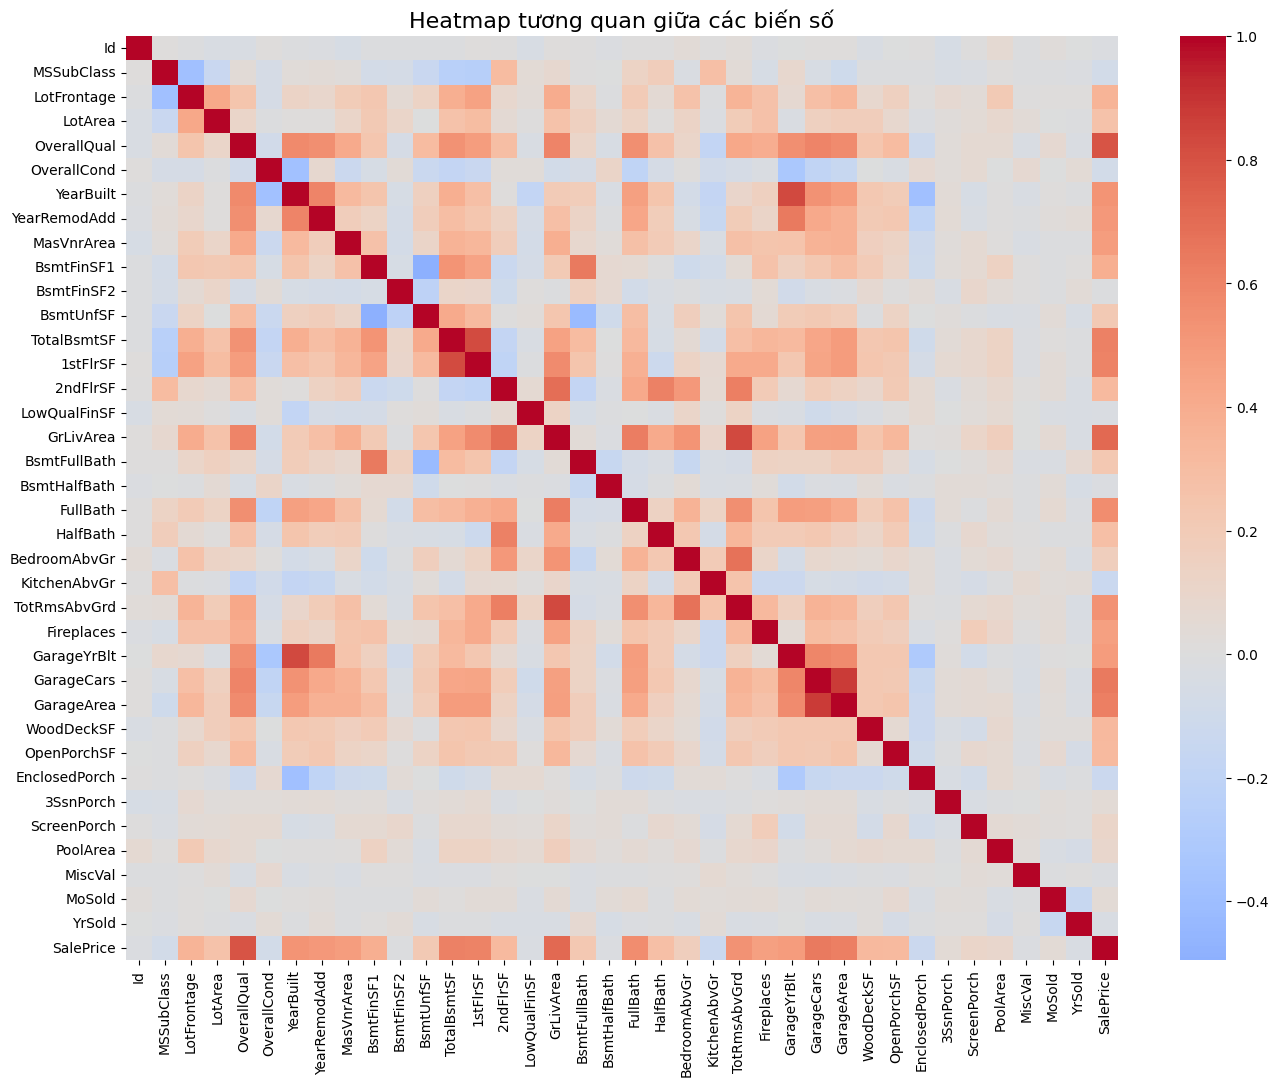

C:\Users\hienm\AppData\Local\Temp\ipykernel_9228\1751294683.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


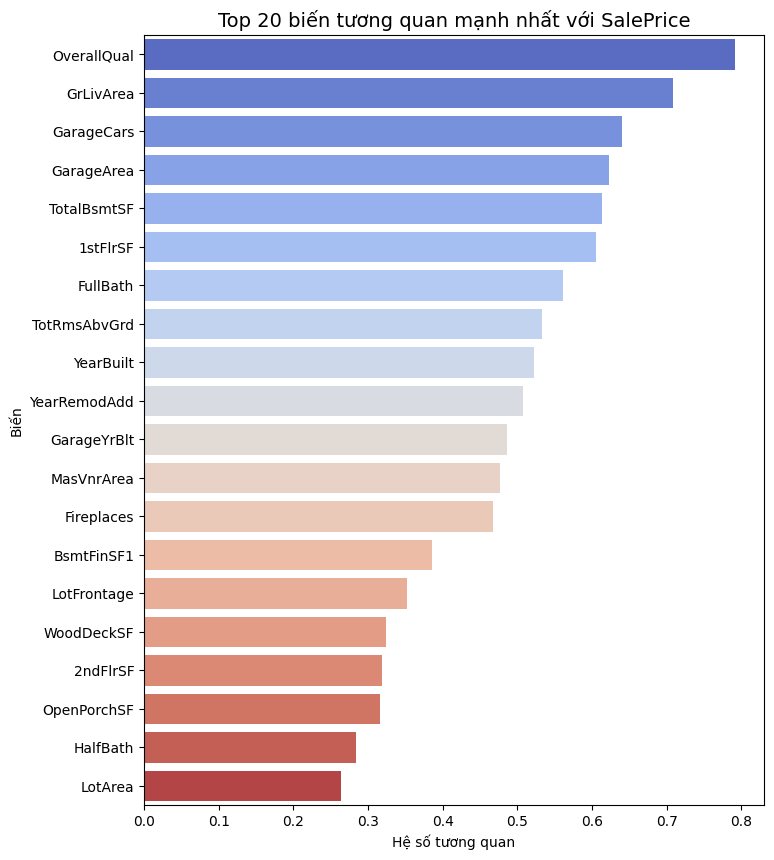

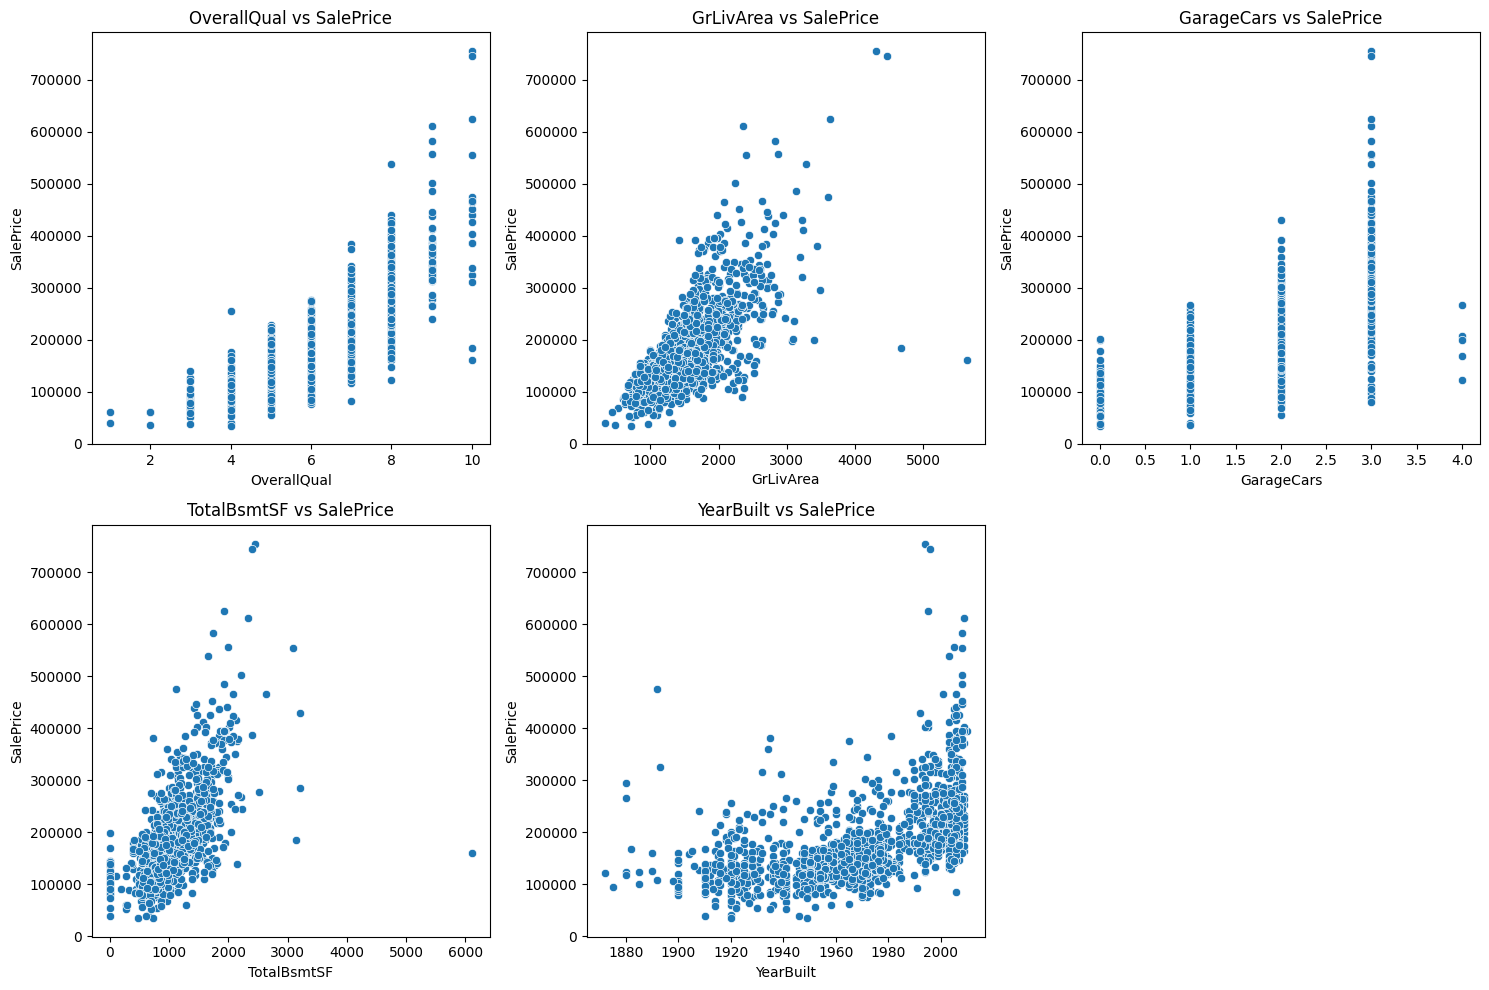

In [177]:
#  Giữ lại các biến dạng số
numeric_df = df.select_dtypes(include=['int64', 'float64'])

#  Tính hệ số tương quan (Pearson)
corr_matrix = numeric_df.corr()

#  Lấy tương quan giữa mỗi biến và SalePrice
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

print(" Tương quan giữa các biến số và SalePrice:")
print(saleprice_corr)

#  Vẽ heatmap toàn bộ ma trận tương quan
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Heatmap tương quan giữa các biến số", fontsize=16)
plt.show()

#  Hiển thị top 20 biến tương quan mạnh nhất với SalePrice
top_corr_features = saleprice_corr.index[1:21]  # Bỏ SalePrice chính nó
plt.figure(figsize=(8, 10))
sns.barplot(
    x=saleprice_corr[top_corr_features],
    y=top_corr_features,
    palette='coolwarm'
)
plt.title("Top 20 biến tương quan mạnh nhất với SalePrice", fontsize=14)
plt.xlabel("Hệ số tương quan")
plt.ylabel("Biến")
plt.show()

#  (Tuỳ chọn) Vẽ scatterplot cho một vài biến nổi bật
top_features_to_plot = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f"{feature} vs SalePrice")
plt.tight_layout()
plt.show()

### Nhận xét:
1. Biến có tương quan mạnh nhất

OverallQual (0.79) → yếu tố chất lượng tổng thể của ngôi nhà có ảnh hưởng lớn nhất đến giá bán.
→ Nhà có chất lượng tốt (vật liệu, thiết kế, hoàn thiện) sẽ có giá cao hơn đáng kể.

🔹 2. Các yếu tố diện tích

GrLivArea (0.71), TotalBsmtSF (0.61), 1stFlrSF (0.61) đều có tương quan cao → diện tích sử dụng là yếu tố rất quan trọng.
→ Nhà lớn hơn (đặc biệt tầng 1 và tầng hầm hoàn thiện) có xu hướng giá cao hơn.

🔹 3. Yếu tố về gara

GarageCars (0.64) và GarageArea (0.62) cho thấy gara lớn hoặc chứa nhiều xe có tác động tích cực đến giá.

🔹 4. Yếu tố về năm xây và cải tạo

YearBuilt (0.52) và YearRemodAdd (0.51) → nhà xây gần đây hoặc được cải tạo gần đây thường có giá cao hơn.

🔹 5. Các yếu tố tiện nghi khác

FullBath (0.56), Fireplaces (0.47), WoodDeckSF (0.32), OpenPorchSF (0.32) → tiện nghi sinh hoạt và không gian ngoài trời góp phần tăng giá trị nhà.

🔹 6. Biến có tương quan yếu hơn (dưới 0.3)

Ví dụ: HalfBath (0.28) – có ảnh hưởng, nhưng không đáng kể so với diện tích hoặc chất lượng nhà.

## ==================================
## Tương quan về các missing value 
## ==================================

===== Thống kê Missing Values =====
              Missing Values  Percentage (%)
PoolQC                  1453       99.520548
MiscFeature             1406       96.301370
Alley                   1369       93.767123
Fence                   1179       80.753425
MasVnrType               872       59.726027
FireplaceQu              690       47.260274
LotFrontage              259       17.739726
GarageType                81        5.547945
GarageYrBlt               81        5.547945
GarageFinish              81        5.547945
GarageQual                81        5.547945
GarageCond                81        5.547945
BsmtExposure              38        2.602740
BsmtFinType2              38        2.602740
BsmtQual                  37        2.534247


C:\Users\hienm\AppData\Local\Temp\ipykernel_9228\864520888.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.head(20), y=missing_percent.head(20).index, palette='viridis')


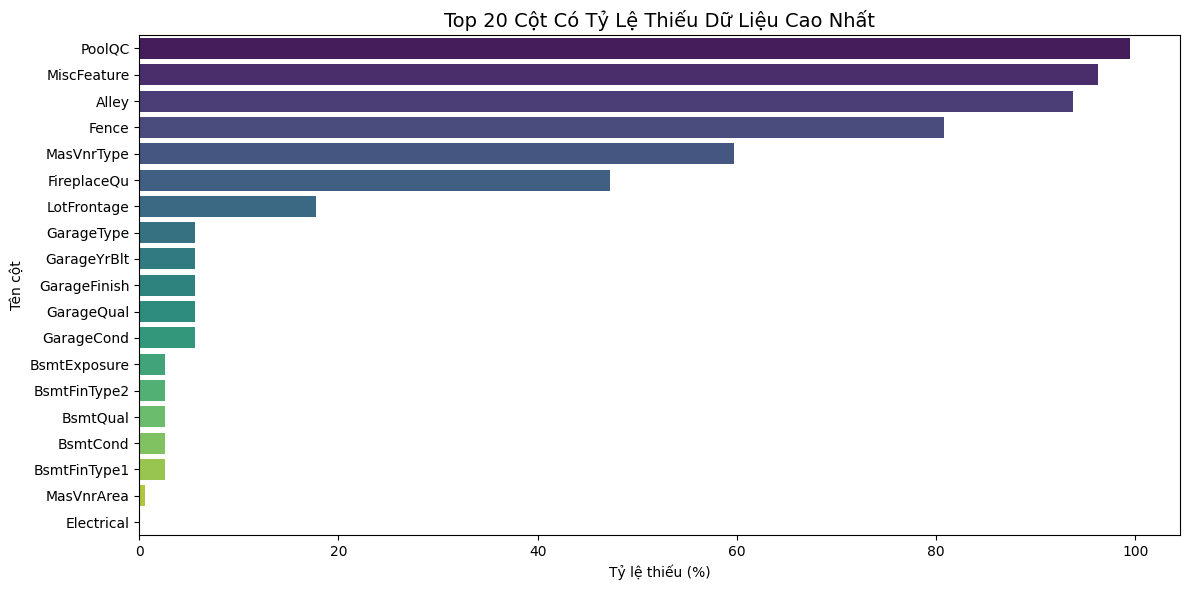

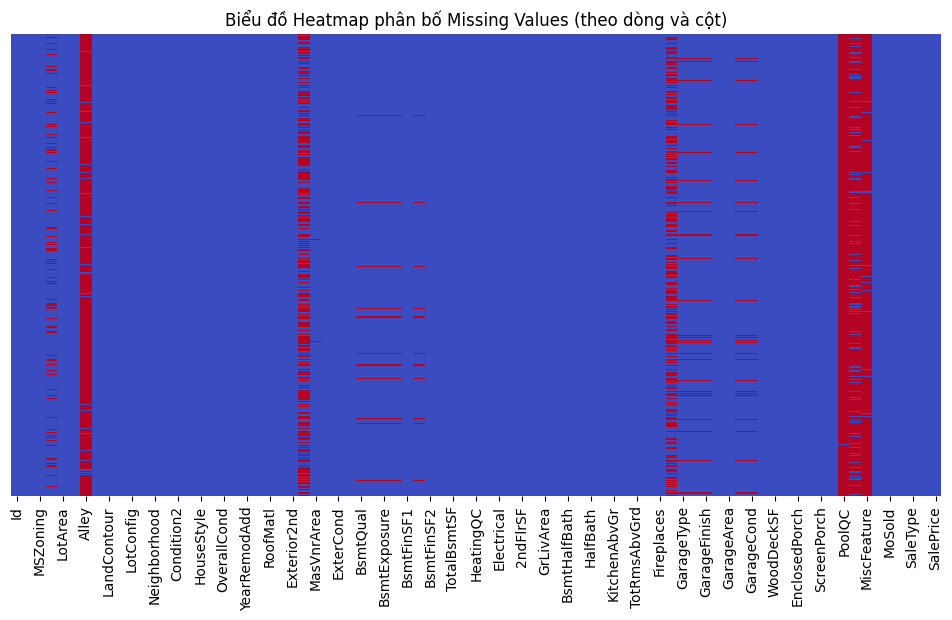

In [178]:
#  Tính số lượng và tỉ lệ giá trị thiếu ở mỗi cột
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

# Tạo DataFrame tổng hợp
missing_data = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})

print("===== Thống kê Missing Values =====")
print(missing_data.head(15))  # Xem top 15 cột bị thiếu nhiều nhất

#  Vẽ biểu đồ cột (Top 20 cột bị thiếu nhiều nhất)
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent.head(20), y=missing_percent.head(20).index, palette='viridis')
plt.title("Top 20 Cột Có Tỷ Lệ Thiếu Dữ Liệu Cao Nhất", fontsize=14)
plt.xlabel("Tỷ lệ thiếu (%)")
plt.ylabel("Tên cột")
plt.tight_layout()
plt.show()

#  (Tuỳ chọn) Vẽ heatmap để xem phân bố missing theo dòng
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')
plt.title("Biểu đồ Heatmap phân bố Missing Values (theo dòng và cột)")
plt.show()

#### Nhận xét tổng quan về missing value:

| Cột                                                      | Tỷ lệ thiếu (%) | Ghi chú                              |
| -------------------------------------------------------- | --------------- | ------------------------------------ |
| `PoolQC`                                                 | ~99%            | Nhà không có hồ bơi                  |
| `MiscFeature`                                            | ~96%            | Không có đặc điểm đặc biệt           |
| `Alley`                                                  | ~93%            | Không có lối xe phụ                  |
| `Fence`                                                  | ~80%            | Không có hàng rào                    |
| `FireplaceQu`                                            | ~47%            | Nhà không có lò sưởi                 |
| `GarageCond`, `GarageType`, `GarageFinish`, `GarageQual` | ~5–6%           | Một số nhà không có gara             |
| `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1/2` | ~2–3%           | Nhà không có tầng hầm                |
| `LotFrontage`                                            | ~17%            | Thiếu giá trị đo độ dài mặt tiền đất |
| `Electrical`, `MasVnrType`, `MasVnrArea`                 | <1%             | Thiếu nhỏ, có thể xử lý đơn giản     |

#### Hướng giải quyết :

| Loại cột                               | Cách xử lý đề xuất                                                                          | Giải thích                                                |
| -------------------------------------- | ------------------------------------------------------------------------------------------- | --------------------------------------------------------- |
| **Categorical (phân loại)**            | Dùng `"None"` hoặc `"No_feature"` để biểu thị không có                                      | Giữ nguyên thông tin rằng “nhà này không có tính năng đó” |
| **Numeric (số)**                       | Dùng `0` cho các đặc trưng không tồn tại (VD: diện tích tầng hầm = 0 nếu không có basement) | Vì 0 mang nghĩa hợp lý (không có)                         |
| **Numeric liên tục (như LotFrontage)** | Điền trung bình theo `Neighborhood`                                                         | Vì mặt tiền đất có xu hướng tương quan theo khu vực       |
| **Ít missing (<1%)**                   | Dùng `mode()` hoặc `median()` để điền                                                       | Không ảnh hưởng nhiều đến phân phối                       |
| **Thiếu quá nhiều (>80%)**             | **Xem xét loại bỏ cột** nếu tính năng đó không quan trọng                                   | Giữ lại có thể gây nhiễu cho mô hình                      |


#### Chi tiết định hướng giải quyết:

| Cột                                                      | Hướng xử lý                                                                  |
| -------------------------------------------------------- | ---------------------------------------------------------------------------- |
| `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu` | Điền `"None"`                                                                |
| `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` | `"None"` cho nhà không có gara                                               |
| `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1/2` | `"None"` cho nhà không có tầng hầm                                           |
| `MasVnrType`, `MasVnrArea`                               | `"None"` và `0` tương ứng                                                    |
| `LotFrontage`                                            | Điền giá trị trung bình theo `Neighborhood`                                  |
| `Electrical`                                             | Điền `mode()` vì chỉ thiếu 1–2 dòng                                          |
| `Utilities`                                              | Nếu 1 loại chiếm gần như 100%, có thể bỏ (vì không mang thông tin phân biệt) |


## ===============================
## Xử lí missing value
## ===============================

In [179]:
# ---  Đọc dữ liệu ---
df = pd.read_csv("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data\\train.csv")

# ---  Các cột xử lý bằng mô hình học máy ---

# 2.1. LotFrontage → dùng regression
# Có tương quan mạnh với LotArea, Neighborhood
lot_features = ['LotArea', 'OverallQual', 'Neighborhood', 'BldgType', 'YearBuilt']
df_encoded = pd.get_dummies(df[lot_features], drop_first=True)

known = df[df['LotFrontage'].notnull()]
unknown = df[df['LotFrontage'].isnull()]

X_train = df_encoded.loc[known.index]
y_train = df.loc[known.index, 'LotFrontage']
X_pred = df_encoded.loc[unknown.index]

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
df.loc[unknown.index, 'LotFrontage'] = rf.predict(X_pred)

print(" Đã xử lý LotFrontage bằng RandomForestRegressor")

# 2.2. GarageYrBlt → dùng regression đơn giản
garage_features = ['YearBuilt', 'GarageCars', 'GarageArea']
mask_garage = df['GarageYrBlt'].isnull()
X_train = df.loc[~mask_garage, garage_features]
y_train = df.loc[~mask_garage, 'GarageYrBlt']
X_pred = df.loc[mask_garage, garage_features]

rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)
df.loc[mask_garage, 'GarageYrBlt'] = rf2.predict(X_pred)

print(" Đã xử lý GarageYrBlt bằng RandomForestRegressor")

# 2.3. MasVnrArea → regression theo MasVnrType + YearBuilt + OverallQual
mas_features = ['MasVnrType', 'YearBuilt', 'OverallQual']
df_encoded_mas = pd.get_dummies(df[mas_features], drop_first=True)

known = df[df['MasVnrArea'].notnull()]
unknown = df[df['MasVnrArea'].isnull()]

X_train = df_encoded_mas.loc[known.index]
y_train = df.loc[known.index, 'MasVnrArea']
X_pred = df_encoded_mas.loc[unknown.index]

rf3 = RandomForestRegressor(n_estimators=150, random_state=42)
rf3.fit(X_train, y_train)
df.loc[unknown.index, 'MasVnrArea'] = rf3.predict(X_pred)

print(" Đã xử lý MasVnrArea bằng RandomForestRegressor")

# 2.4. BsmtExposure → classification (vì là biến phân loại)
bsmt_features = ['TotalBsmtSF', 'OverallQual', 'Neighborhood']
df_encoded_bsmt = pd.get_dummies(df[bsmt_features], drop_first=True)

known = df[df['BsmtExposure'].notnull()]
unknown = df[df['BsmtExposure'].isnull()]

X_train = df_encoded_bsmt.loc[known.index]
y_train = df.loc[known.index, 'BsmtExposure']
X_pred = df_encoded_bsmt.loc[unknown.index]

rf_cls = RandomForestClassifier(n_estimators=150, random_state=42)
rf_cls.fit(X_train, y_train)
df.loc[unknown.index, 'BsmtExposure'] = rf_cls.predict(X_pred)

print(" Đã xử lý BsmtExposure bằng RandomForestClassifier")

# ---  Các cột còn lại: xử lý logic / thống kê ---
# (Dựa theo mô tả dữ liệu của Kaggle)

fill_none_cols = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'
]
df[fill_none_cols] = df[fill_none_cols].fillna('None')

fill_zero_cols = [
    'GarageCars', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'PoolArea'
]
df[fill_zero_cols] = df[fill_zero_cols].fillna(0)

# Fill bằng mode (phổ biến nhất)
for col in ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill bằng median (với biến numeric thông thường)
for col in ['MSZoning', 'Functional']:
    df[col] = df[col].fillna(df[col].median() if df[col].dtype != 'O' else df[col].mode()[0])

# ---  Kiểm tra tổng số missing còn lại ---
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print("\n Các cột vẫn còn missing (nếu có):")
print(missing_summary if not missing_summary.empty else "Không còn missing value nào!")

# ---  Lưu dữ liệu đã xử lý ---
df.to_csv("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data_afterfix\\train_cleaned.csv", index=False)
print("\n Dữ liệu sau khi xử lý missing values đã được lưu vào: train_cleaned.csv")

 Đã xử lý LotFrontage bằng RandomForestRegressor
 Đã xử lý GarageYrBlt bằng RandomForestRegressor
 Đã xử lý MasVnrArea bằng RandomForestRegressor
 Đã xử lý BsmtExposure bằng RandomForestClassifier

 Các cột vẫn còn missing (nếu có):
Không còn missing value nào!

 Dữ liệu sau khi xử lý missing values đã được lưu vào: train_cleaned.csv


## Lưu model đã dùng để xử lí missing data ở train.csv

In [180]:
save_dir = "C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\model"
os.makedirs(save_dir, exist_ok=True)

joblib.dump(rf, os.path.join(save_dir, "lotfrontage_model.pkl"))
joblib.dump(rf2, os.path.join(save_dir, "garageyr_model.pkl"))
joblib.dump(rf3, os.path.join(save_dir, "masvnr_model.pkl"))
joblib.dump(rf_cls, os.path.join(save_dir, "bsmt_model.pkl"))

print(f" Đã lưu 4 mô hình RandomForest vào thư mục: {save_dir}")

 Đã lưu 4 mô hình RandomForest vào thư mục: C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\model


## Xử lí missing value cho test.csv

In [181]:

# ---  Đọc dữ liệu ---
test = pd.read_csv("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data\\test.csv")

# ---  Đọc lại mô hình đã huấn luyện từ train ---
# (Nếu bạn đã chạy đoạn train trước và lưu lại)
try:
    rf = joblib.load("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\model\\lotfrontage_model.pkl")
    rf2 = joblib.load("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\model\\garageyr_model.pkl")
    rf3 = joblib.load("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\model\\masvnr_model.pkl")
    rf_cls = joblib.load("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\model\\bsmt_model.pkl")
    print(" Đã load các mô hình RandomForest từ train.")
except:
    print(" Chưa có mô hình lưu sẵn. Sẽ khởi tạo mô hình mới.")
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
    rf3 = RandomForestRegressor(n_estimators=150, random_state=42)
    rf_cls = RandomForestClassifier(n_estimators=150, random_state=42)

# ---  2.1. LotFrontage ---
lot_features = ['LotArea', 'OverallQual', 'Neighborhood', 'BldgType', 'YearBuilt']
df_encoded = pd.get_dummies(test[lot_features], drop_first=True)

mask = test['LotFrontage'].isnull()
if mask.sum() > 0:
    X_pred = df_encoded.loc[mask.index]
    try:
        test.loc[mask.index, 'LotFrontage'] = rf.predict(X_pred)
    except:
        test.loc[mask.index, 'LotFrontage'] = X_pred['LotArea'] ** 0.5 * 0.5  # fallback cơ bản
print(" Đã xử lý LotFrontage")

# ---  2.2. GarageYrBlt ---
garage_features = ['YearBuilt', 'GarageCars', 'GarageArea']
mask_garage = test['GarageYrBlt'].isnull()
if mask_garage.sum() > 0:
    X_pred = test.loc[mask_garage, garage_features]
    try:
        test.loc[mask_garage, 'GarageYrBlt'] = rf2.predict(X_pred)
    except:
        test.loc[mask_garage, 'GarageYrBlt'] = test.loc[mask_garage, 'YearBuilt']
print(" Đã xử lý GarageYrBlt")

# ---  2.3. MasVnrArea ---
mas_features = ['MasVnrType', 'YearBuilt', 'OverallQual']
df_encoded_mas = pd.get_dummies(test[mas_features], drop_first=True)

mask = test['MasVnrArea'].isnull()
if mask.sum() > 0:
    X_pred = df_encoded_mas.loc[mask.index]
    try:
        test.loc[mask.index, 'MasVnrArea'] = rf3.predict(X_pred)
    except:
        test.loc[mask.index, 'MasVnrArea'] = 0
print(" Đã xử lý MasVnrArea")

# ---  2.4. BsmtExposure ---
bsmt_features = ['TotalBsmtSF', 'OverallQual', 'Neighborhood']
df_encoded_bsmt = pd.get_dummies(test[bsmt_features], drop_first=True)

mask = test['BsmtExposure'].isnull()
if mask.sum() > 0:
    X_pred = df_encoded_bsmt.loc[mask.index]
    try:
        test.loc[mask.index, 'BsmtExposure'] = rf_cls.predict(X_pred)
    except:
        test.loc[mask.index, 'BsmtExposure'] = 'No'
print(" Đã xử lý BsmtExposure")

# ---   Các cột còn lại: xử lý logic / thống kê ---
fill_none_cols = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'
]
test[fill_none_cols] = test[fill_none_cols].fillna('None')

fill_zero_cols = [
    'GarageCars', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'PoolArea'
]
test[fill_zero_cols] = test[fill_zero_cols].fillna(0)

# Fill bằng mode (giá trị phổ biến nhất)
for col in ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    if col in test.columns:
        test[col] = test[col].fillna(test[col].mode()[0])

# Fill bằng median hoặc mode tùy kiểu dữ liệu
for col in ['MSZoning', 'Functional']:
    if col in test.columns:
        test[col] = test[col].fillna(test[col].median() if test[col].dtype != 'O' else test[col].mode()[0])

# ---  Kiểm tra missing còn lại ---
missing_summary = test.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print("\n Các cột vẫn còn missing (nếu có):")
print(missing_summary if not missing_summary.empty else "Không còn missing value nào!")

# ---  Lưu dữ liệu ---
test.to_csv("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data_afterfix\\test_cleaned.csv", index=False)
print("\n Dữ liệu TEST sau khi xử lý missing values đã được lưu vào: test_cleaned.csv")

 Đã load các mô hình RandomForest từ train.
 Đã xử lý LotFrontage
 Đã xử lý GarageYrBlt
 Đã xử lý MasVnrArea
 Đã xử lý BsmtExposure

 Các cột vẫn còn missing (nếu có):
Utilities    2
dtype: int64

 Dữ liệu TEST sau khi xử lý missing values đã được lưu vào: test_cleaned.csv


# ============================================
#  4. Phát hiện và xử lý Outliers
# ============================================

In [182]:
# Chọn các cột dạng số (loại bỏ Id)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('Id', errors='ignore')

## ============================================
##  Phương pháp IQR
## ============================================

In [183]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers.index

iqr_outlier_indices = []
for col in numeric_cols:
    iqr_outlier_indices.extend(detect_outliers_iqr(df, col))

iqr_outlier_counts = pd.Series(iqr_outlier_indices).value_counts()
iqr_multi_outliers = iqr_outlier_counts[iqr_outlier_counts > 2].index
df_iqr_cleaned = df.drop(iqr_multi_outliers)

## ============================================
##  Phương pháp Z-score
## ============================================

In [184]:
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
threshold = 3
outlier_rows = np.where(z_scores > threshold)[0]
outlier_rows = np.unique(outlier_rows)
df_z_cleaned = df.drop(index=outlier_rows)

## =====================================
## So sánh và tìm ra phương pháp tối ưu
## =====================================

===== SO SÁNH IQR vs Z-SCORE =====
Số dòng ban đầu: 1460
Số dòng sau khi loại bằng IQR: 1293
Số dòng bị loại (IQR): 167
Số dòng sau khi loại bằng Z-score: 1017
Số dòng bị loại (Z-score): 443


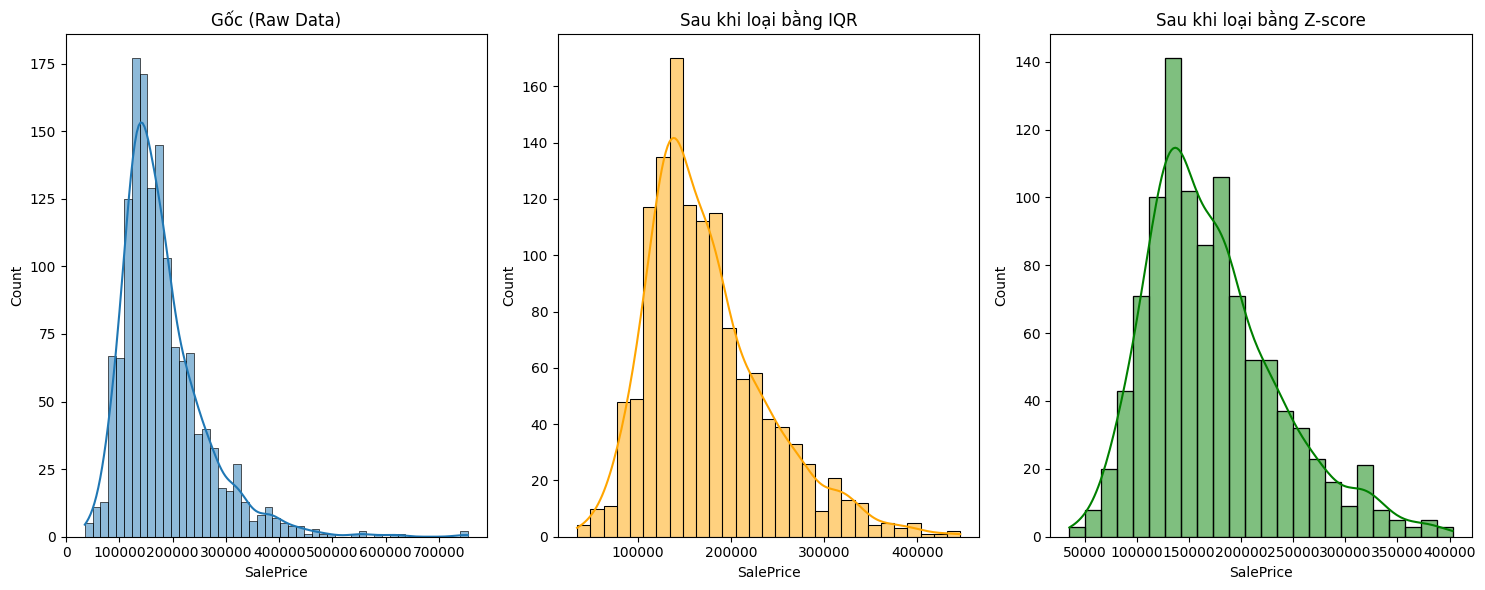


 Gợi ý chọn phương pháp tối ưu:
 Phương pháp IQR có vẻ tối ưu hơn — vì loại bỏ ít dòng hơn và phù hợp cho dữ liệu lệch (như SalePrice).


In [185]:

#  So sánh kết quả

print("===== SO SÁNH IQR vs Z-SCORE =====")
print(f"Số dòng ban đầu: {len(df)}")
print(f"Số dòng sau khi loại bằng IQR: {len(df_iqr_cleaned)}")
print(f"Số dòng bị loại (IQR): {len(df) - len(df_iqr_cleaned)}")
print(f"Số dòng sau khi loại bằng Z-score: {len(df_z_cleaned)}")
print(f"Số dòng bị loại (Z-score): {len(df) - len(df_z_cleaned)}")


#  So sánh phân phối SalePrice

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title("Gốc (Raw Data)")

plt.subplot(1, 3, 2)
sns.histplot(df_iqr_cleaned['SalePrice'], kde=True, color='orange')
plt.title("Sau khi loại bằng IQR")

plt.subplot(1, 3, 3)
sns.histplot(df_z_cleaned['SalePrice'], kde=True, color='green')
plt.title("Sau khi loại bằng Z-score")

plt.tight_layout()
plt.show()

# Gợi ý chọn phương pháp tối ưu

# So sánh số lượng dòng bị loại
removed_iqr = len(df) - len(df_iqr_cleaned)
removed_z = len(df) - len(df_z_cleaned)

if removed_iqr < removed_z:
    suggestion = " Phương pháp IQR có vẻ tối ưu hơn — vì loại bỏ ít dòng hơn và phù hợp cho dữ liệu lệch (như SalePrice)."
else:
    suggestion = " Phương pháp Z-score có vẻ tối ưu hơn — vì loại bỏ nhiễu nhiều hơn, phù hợp nếu dữ liệu gần chuẩn."

print("\n Gợi ý chọn phương pháp tối ưu:")
print(suggestion)

## =============================
## Xử lý bằng IQR
## =============================

===== KẾT QUẢ XỬ LÝ OUTLIER (IQR) =====
Số dòng ban đầu: 1460
Số dòng sau khi loại bỏ outlier: 1225
Số dòng bị loại bỏ: 235


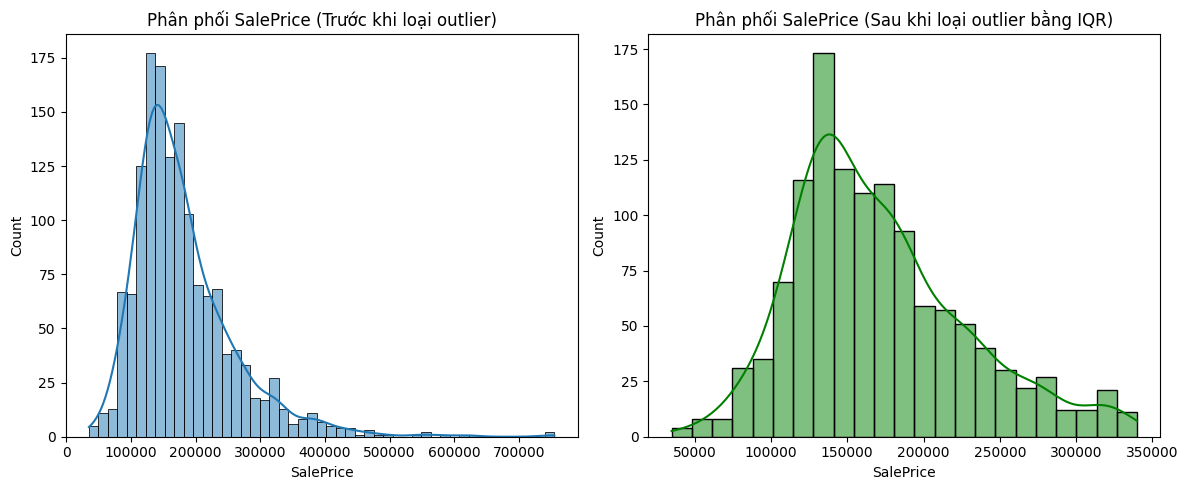

 Đã lưu file dữ liệu làm sạch: C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\train_cleaned_iqr.csv


In [186]:
#  Đọc dữ liệu đã xử lý missing values
df = pd.read_csv("C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data_afterfix\\train_cleaned.csv")

#  Hàm loại bỏ outlier bằng IQR
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        if df_clean[col].dtype in ['int64', 'float64']:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

#  Chọn các cột numeric quan trọng để kiểm tra outlier
num_cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'LotFrontage', '1stFlrSF', 'GarageArea']

#  Loại bỏ outlier
df_iqr_cleaned = remove_outliers_iqr(df, num_cols)

#  Thống kê & trực quan hoá
print("===== KẾT QUẢ XỬ LÝ OUTLIER (IQR) =====")
print(f"Số dòng ban đầu: {len(df)}")
print(f"Số dòng sau khi loại bỏ outlier: {len(df_iqr_cleaned)}")
print(f"Số dòng bị loại bỏ: {len(df) - len(df_iqr_cleaned)}")

# So sánh phân phối SalePrice trước & sau khi làm sạch
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title("Phân phối SalePrice (Trước khi loại outlier)")

plt.subplot(1, 2, 2)
sns.histplot(df_iqr_cleaned['SalePrice'], kde=True, color='green')
plt.title("Phân phối SalePrice (Sau khi loại outlier bằng IQR)")

plt.tight_layout()
plt.show()

# 6️⃣ Lưu file đã làm sạch hoàn chỉnh
output_path = "C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data_afterfix\\train_cleaned_iqr.csv"
df_iqr_cleaned.to_csv(output_path, index=False)
print(f" Đã lưu file dữ liệu làm sạch: {output_path}")

## ============================
## Feature Engineering
## ============================

Những cột categorical (object), ít hơn 20 giá trị duy nhất, và mang thông tin mô tả hoặc chất lượng → nên xử lý 1→n bằng one-hot / ordinal encoding.

| Cột                         | Biến đổi đề xuất                               | Lý do                                                                                        |
| --------------------------- | ---------------------------------------------- | -------------------------------------------------------------------------------------------- |
| `SalePrice`                 | `np.log1p(SalePrice)`                          | Giảm **skewness** vì giá nhà có phân phối lệch phải mạnh (các giá trị cực lớn kéo dài đuôi). |
| `GrLivArea`                 | `np.log1p(GrLivArea)`                          | Giảm skewness, giúp mô hình tuyến tính hóa mối quan hệ giữa diện tích và giá.                |
| `TotalBsmtSF`               | `np.log1p(TotalBsmtSF)`                        | Tầng hầm cũng có phân phối lệch, log giúp ổn định hơn.                                       |
| `LotArea`                   | `np.log1p(LotArea)`                            | Nhiều mảnh đất nhỏ và ít mảnh đất rất lớn → phân phối lệch phải.                             |
| `1stFlrSF`, `GarageArea`    | `np.log1p()` hoặc **StandardScaler()**         | Chuẩn hóa để mô hình không bị lệch về scale.                                                 |
| `YearBuilt`, `YearRemodAdd` | Dùng để tính **HouseAge = YrSold – YearBuilt** | Chuyển năm thành tuổi giúp mô hình hiểu ý nghĩa thực tế.                                     |



Những cột categorical (object), ít hơn 20 giá trị duy nhất, và mang thông tin mô tả hoặc chất lượng → nên xử lý 1→n bằng one-hot / ordinal encoding.

| Cột                                     | Loại mã hóa                            | Lý do                                                                 |
| --------------------------------------- | -------------------------------------- | --------------------------------------------------------------------- |
| `Neighborhood`                          | One-hot encoding                       | Mỗi khu vực có giá trung bình khác nhau → ảnh hưởng mạnh đến giá nhà. |
| `MSZoning`                              | One-hot encoding                       | Phân vùng đất (Residential, Commercial...) ảnh hưởng mạnh đến giá.    |
| `Exterior1st`, `Exterior2nd`            | One-hot                                | Chất liệu mặt ngoài phản ánh chất lượng và chi phí.                   |
| `HouseStyle`, `BldgType`                | One-hot                                | Kiểu nhà / loại nhà ảnh hưởng đến giá trị và diện tích.               |
| `RoofStyle`, `Foundation`               | One-hot                                | Ảnh hưởng đến chất lượng & chi phí bảo trì.                           |
| `SaleCondition`, `SaleType`             | One-hot                                | Cách bán (Normal, Abnormal, Partial...) cho thấy tính thanh khoản.    |
| `CentralAir`                            | Binary (0/1)                           | Có điều hòa hay không ảnh hưởng đến tiện nghi.                        |
| `GarageType`, `GarageFinish`            | One-hot                                | Kiểu garage là chỉ dấu chất lượng nhà.                                |
| `HeatingQC`, `KitchenQual`, `ExterQual` | Ordinal Encoding (nếu dùng tree model) | Là thang chất lượng (Ex, Gd, TA, Fa, Po) có thứ tự rõ ràng.           |


Những cột có liên hệ vật lý hoặc logic thực tế với nhau (diện tích, năm, chất lượng, số lượng tiện nghi) → nên kết hợp theo n→n

| Cột kết hợp                             | Feature mới                                          | Ý nghĩa / Lý do                                                        |
| --------------------------------------- | ---------------------------------------------------- | ---------------------------------------------------------------------- |
| `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`   | `TotalSF` = Tổng diện tích sàn                       | Phản ánh tổng quy mô nhà — đặc trưng mạnh nhất cho giá.                |
| `OverallQual`, `GrLivArea`              | `OverallQual_GrLivArea`                              | Nhân để thể hiện **chất lượng * diện tích** (nhà lớn & đẹp → giá cao). |
| `FullBath`, `HalfBath`, `TotRmsAbvGrd`  | `BathPerRoom` = (FullBath + HalfBath) / TotRmsAbvGrd | Tỷ lệ phòng tắm trên tổng số phòng, phản ánh tiện nghi.                |
| `GarageArea`, `GrLivArea`               | `GarageQuality` = GarageArea / GrLivArea             | Nhà to mà garage nhỏ → tiện ích thấp.                                  |
| `YrSold`, `YearBuilt`                   | `HouseAge` = YrSold – YearBuilt                      | Tuổi nhà càng cao, giá thường giảm.                                    |
| `YrSold`, `YearRemodAdd`                | `RemodAge` = YrSold – YearRemodAdd                   | Thời gian từ khi sửa chữa → càng mới càng giá trị.                     |
| `Fireplaces`, `TotalSF`                 | `FireplacesPerSF` = Fireplaces / TotalSF             | Phản ánh sự tiện nghi tương đối.                                       |
| `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF` | `BsmtTotalSF`                                        | Tổng diện tích tầng hầm hữu ích.                                       |
| `LotFrontage`, `LotArea`                | `FrontageRatio` = LotFrontage / LotArea              | Mảnh đất “mặt tiền rộng” có giá trị cao hơn.                           |


In [187]:

# --- Sao chép dữ liệu ---
df_fe = df_iqr_cleaned.copy()

# --- Tạo thư mục lưu model ---
model_dir = r"C:\\Users\\hienm\\OneDrive\Desktop\\Machine_Learning_2025-2026\\challange2\\model"
os.makedirs(model_dir, exist_ok=True)

# ============================================================
#   FEATURE ENGINEERING 1 → 1
# ============================================================

# --- Log transform (giảm skewness) ---
for col in ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'LotArea']:
    df_fe[col + '_log'] = np.log1p(df_fe[col])

# --- Chuẩn hóa (Standardization) ---
scaler = StandardScaler()
scaler.fit(df_fe[['1stFlrSF', 'GarageArea']])

# Lưu scaler để dùng lại trong test
scaler_path = os.path.join(model_dir, "scaler.pkl")
joblib.dump(scaler, scaler_path)
print(f" Đã lưu scaler vào: {scaler_path}")

# Transform dữ liệu train
scaled_features = scaler.transform(df_fe[['1stFlrSF', 'GarageArea']])
df_fe[['1stFlrSF_scaled', 'GarageArea_scaled']] = scaled_features

# --- Biến đổi năm thành tuổi ---
df_fe['HouseAge'] = df_fe['YrSold'] - df_fe['YearBuilt']
df_fe['RemodAge'] = df_fe['YrSold'] - df_fe['YearRemodAdd']

print(" Hoàn tất bước 1→1: Log transform, scale, tuổi nhà")

# ============================================================
#   FEATURE ENGINEERING 1 → n
# ============================================================

# --- Các cột phân loại quan trọng ---
categorical_cols = [
    'Neighborhood', 'MSZoning', 'HouseStyle', 'BldgType',
    'Exterior1st', 'Exterior2nd', 'RoofStyle', 'Foundation',
    'SaleCondition', 'SaleType', 'GarageType', 'GarageFinish',
    'HeatingQC', 'KitchenQual', 'ExterQual', 'CentralAir'
]

# --- Phân loại ordinal: có thứ tự chất lượng ---
ordinal_cols = ['HeatingQC', 'KitchenQual', 'ExterQual']
qual_order = [['Po', 'Fa', 'TA', 'Gd', 'Ex']]

encoder = OrdinalEncoder(categories=qual_order * len(ordinal_cols))
encoder.fit(df_fe[ordinal_cols])

# Lưu encoder để dùng lại trong test
encoder_path = os.path.join(model_dir, "ordinal_encoder.pkl")
joblib.dump(encoder, encoder_path)
print(f" Đã lưu OrdinalEncoder vào: {encoder_path}")

# Transform dữ liệu
df_fe[ordinal_cols] = encoder.transform(df_fe[ordinal_cols])

# --- One-hot encoding cho phần còn lại ---
df_fe = pd.get_dummies(df_fe, columns=[
    c for c in categorical_cols if c not in ordinal_cols
], drop_first=True)

print(" Hoàn tất bước 1→n: One-hot và Ordinal Encoding")

# ============================================================
#   FEATURE ENGINEERING n → n
# ============================================================

df_fe['TotalSF'] = df_fe['TotalBsmtSF'] + df_fe['1stFlrSF'] + df_fe['2ndFlrSF']
df_fe['OverallQual_GrLivArea'] = df_fe['OverallQual'] * df_fe['GrLivArea']
df_fe['BathPerRoom'] = (df_fe['FullBath'] + df_fe['HalfBath']) / (df_fe['TotRmsAbvGrd'] + 1)
df_fe['GarageQuality'] = df_fe['GarageArea'] / (df_fe['GrLivArea'] + 1)
df_fe['FireplacesPerSF'] = df_fe['Fireplaces'] / (df_fe['TotalSF'] + 1)
df_fe['FrontageRatio'] = df_fe['LotFrontage'] / (df_fe['LotArea'] + 1)

print(" Hoàn tất bước n→n: Kết hợp, tỷ lệ và tương tác đặc trưng")

# ============================================================
#   XUẤT DỮ LIỆU SAU FEATURE ENGINEERING
# ============================================================

print("\n=== TỔNG KẾT FEATURE ENGINEERING ===")
print(f"Số dòng dữ liệu: {df_fe.shape[0]}")
print(f"Tổng số cột sau khi tạo feature: {df_fe.shape[1]}")

output_path = r"C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\train_featured.csv"
df_fe.to_csv(output_path, index=False)
print(f" Đã lưu dữ liệu sau Feature Engineering tại: {output_path}")


 Đã lưu scaler vào: C:\\Users\\hienm\\OneDrive\Desktop\\Machine_Learning_2025-2026\\challange2\\model\scaler.pkl
 Hoàn tất bước 1→1: Log transform, scale, tuổi nhà
 Đã lưu OrdinalEncoder vào: C:\\Users\\hienm\\OneDrive\Desktop\\Machine_Learning_2025-2026\\challange2\\model\ordinal_encoder.pkl
 Hoàn tất bước 1→n: One-hot và Ordinal Encoding
 Hoàn tất bước n→n: Kết hợp, tỷ lệ và tương tác đặc trưng

=== TỔNG KẾT FEATURE ENGINEERING ===
Số dòng dữ liệu: 1225
Tổng số cột sau khi tạo feature: 177
 Đã lưu dữ liệu sau Feature Engineering tại: C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\train_featured.csv


## Feature Engineering cho Test.csv

In [188]:
# --- Đọc dữ liệu test ---
df_test = pd.read_csv(
    r"C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\test_cleaned.csv"
)

# --- Sao chép dữ liệu ---
df_fe_test = df_test.copy()

# --- Đường dẫn model (scaler + encoder) từ train ---
model_dir = r"C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\model"
scaler_path = os.path.join(model_dir, "scaler.pkl")
encoder_path = os.path.join(model_dir, "ordinal_encoder.pkl")

# ============================================================
#   FEATURE ENGINEERING 1 → 1
# ============================================================

# --- Log transform ---
for col in ['GrLivArea', 'TotalBsmtSF', 'LotArea']:
    df_fe_test[col + '_log'] = np.log1p(df_fe_test[col])

# --- Dùng scaler từ train ---
if os.path.exists(scaler_path):
    scaler = joblib.load(scaler_path)
    print(" Đã load scaler.pkl từ train")
else:
    print(" Không tìm thấy scaler.pkl → sẽ fit tạm trên test (KHÔNG KHUYÊN DÙNG)")
    scaler = StandardScaler().fit(df_fe_test[['1stFlrSF', 'GarageArea']])
    joblib.dump(scaler, scaler_path)

scaled_features = scaler.transform(df_fe_test[['1stFlrSF', 'GarageArea']])
df_fe_test[['1stFlrSF_scaled', 'GarageArea_scaled']] = scaled_features

# --- Tuổi nhà & tuổi sửa ---
df_fe_test['HouseAge'] = df_fe_test['YrSold'] - df_fe_test['YearBuilt']
df_fe_test['RemodAge'] = df_fe_test['YrSold'] - df_fe_test['YearRemodAdd']

print(" Hoàn tất bước 1→1: Log, scale, tuổi nhà")

# ============================================================
#   FEATURE ENGINEERING 1 → n (Ordinal only)
# ============================================================

categorical_cols = [
    'Neighborhood', 'MSZoning', 'HouseStyle', 'BldgType',
    'Exterior1st', 'Exterior2nd', 'RoofStyle', 'Foundation',
    'SaleCondition', 'SaleType', 'GarageType', 'GarageFinish',
    'HeatingQC', 'KitchenQual', 'ExterQual', 'CentralAir'
]

ordinal_cols = ['HeatingQC', 'KitchenQual', 'ExterQual']

# --- Load OrdinalEncoder từ train ---
if os.path.exists(encoder_path):
    encoder = joblib.load(encoder_path)
    print(" Đã load OrdinalEncoder từ train.pkl")
else:
    print(" Không tìm thấy ordinal_encoder.pkl → fit tạm trên test (KHÔNG KHUYÊN DÙNG)")
    qual_order = [['Po', 'Fa', 'TA', 'Gd', 'Ex']]
    encoder = OrdinalEncoder(categories=qual_order * len(ordinal_cols))
    encoder.fit(df_fe_test[ordinal_cols])
    joblib.dump(encoder, encoder_path)

df_fe_test[ordinal_cols] = encoder.transform(df_fe_test[ordinal_cols])

print(" Hoàn tất bước 1→n (Ordinal Encoding). Chưa One-Hot Encoding.")

# ============================================================
#   FEATURE ENGINEERING n → n
# ============================================================

df_fe_test['TotalSF'] = (
    df_fe_test['TotalBsmtSF'] + df_fe_test['1stFlrSF'] + df_fe_test['2ndFlrSF']
)
df_fe_test['OverallQual_GrLivArea'] = df_fe_test['OverallQual'] * df_fe_test['GrLivArea']
df_fe_test['BathPerRoom'] = (df_fe_test['FullBath'] + df_fe_test['HalfBath']) / (df_fe_test['TotRmsAbvGrd'] + 1)
df_fe_test['GarageQuality'] = df_fe_test['GarageArea'] / (df_fe_test['GrLivArea'] + 1)
df_fe_test['FireplacesPerSF'] = df_fe_test['Fireplaces'] / (df_fe_test['TotalSF'] + 1)
df_fe_test['FrontageRatio'] = df_fe_test['LotFrontage'] / (df_fe_test['LotArea'] + 1)

print(" Hoàn tất bước n→n: Kết hợp, tỷ lệ và tương tác đặc trưng")

# ============================================================
#   LƯU FILE TEST FEATURED (CHƯA ONE-HOT)
# ============================================================

output_path = r"C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\test_featured_pre_encoding.csv"
df_fe_test.to_csv(output_path, index=False)

print("\n=== TỔNG KẾT FEATURE ENGINEERING TEST ===")
print(f"Số dòng dữ liệu: {df_fe_test.shape[0]}")
print(f"Tổng số cột sau feature: {df_fe_test.shape[1]}")
print(f" Đã lưu dữ liệu tại: {output_path}")

 Đã load scaler.pkl từ train
 Hoàn tất bước 1→1: Log, scale, tuổi nhà
 Đã load OrdinalEncoder từ train.pkl
 Hoàn tất bước 1→n (Ordinal Encoding). Chưa One-Hot Encoding.
 Hoàn tất bước n→n: Kết hợp, tỷ lệ và tương tác đặc trưng

=== TỔNG KẾT FEATURE ENGINEERING TEST ===
Số dòng dữ liệu: 1459
Tổng số cột sau feature: 93
 Đã lưu dữ liệu tại: C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\test_featured_pre_encoding.csv


## ============================
## Feature Scaling va Encoding
## ============================

Chọn Ordinal Encoding cho một số cột (ExterQual, KitchenQual, ...) :


Bản chất:

Các cột như ExterQual, KitchenQual, HeatingQC, ExterCond, FireplaceQu là điểm đánh giá theo thang (ví dụ: Po < Fa < TA < Gd < Ex).
Đây là biến có thứ tự (ordinal).

Lý do dùng Ordinal Encoding:

Gán một số nguyên theo thứ tự (ví dụ Po=1, Fa=2, TA=3, Gd=4, Ex=5) bảo toàn thông tin thứ tự, cho phép mô hình hiểu "Ex tốt hơn Gd".

Đặc biệt hữu ích cho mô hình tuyến tính (Lasso/Ridge) vì mức tăng/giảm có ý nghĩa.

Với tree-based models (XGBoost/LightGBM) ordinal encoding cũng ổn nhưng cần lưu ý: tree có thể tận dụng ranking.

Dùng One-Hot Encoding cho các biến nominal (ví dụ Neighborhood, MSZoning, ...)

Bản chất:

Các cột như Neighborhood, HouseStyle, Exterior1st là không có thứ tự — mỗi mức là một category khác biệt.

Lý do One-Hot:

Không giả định thứ tự giữa các category.

Mô hình tuyến tính có thể học coefficient riêng cho từng category.

Dễ interpret (hữu ích khi bạn muốn biết neighborhood nào tác động thế nào).

Dùng StandardScaler cho numeric features

Mục đích:

Các thuật toán tuyến tính và regularized (Lasso/Ridge) cần features có cùng scale để penalty hoạt động công bằng trên các coefficient.

Gradient descent-based optimizers hội tụ nhanh hơn nếu các feature có variance tương tự.

In [189]:
# ===  Đọc dữ liệu đã qua feature engineering ===
df = pd.read_csv(r"C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data_afterfix\\train_featured.csv")

print(f" Dữ liệu ban đầu: {df.shape[0]} dòng, {df.shape[1]} cột")

# ===  Chia biến số và biến phân loại ===
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f" Số cột numeric: {len(num_cols)}")
print(f" Số cột categorical: {len(cat_cols)}")

# ===  Mã hóa các biến phân loại có thứ tự (Ordinal) ===
# Mapping cho các biến có thứ tự chất lượng, điều kiện, v.v.
quality_mapping = {
    "Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0
}

ordinal_features = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC",
    "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"
]

for col in ordinal_features:
    if col in df.columns:
        df[col] = df[col].map(quality_mapping).fillna(0)

# ===  One-Hot Encoding cho biến phân loại không có thứ tự ===
nominal_features = [c for c in cat_cols if c not in ordinal_features]

df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

print(f" Sau khi One-Hot Encoding: {df.shape[1]} cột")

# ===  Feature Scaling cho biến số ===
# Loại trừ SalePrice và SalePrice_log (nếu có)
num_features = [c for c in num_cols if c not in ["SalePrice", "SalePrice_log"]]

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

print(" Đã chuẩn hoá toàn bộ biến số (StandardScaler)")

# ===  Xuất dữ liệu sẵn sàng cho Modeling ===
output_path = r"C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data_afterfix\\train_ready_for_model.csv"
df.to_csv(output_path, index=False)

print(f" Đã lưu dữ liệu sẵn sàng cho modeling: {output_path}")

 Dữ liệu ban đầu: 1225 dòng, 177 cột
 Số cột numeric: 55
 Số cột categorical: 27
 Sau khi One-Hot Encoding: 225 cột
 Đã chuẩn hoá toàn bộ biến số (StandardScaler)
 Đã lưu dữ liệu sẵn sàng cho modeling: C:\\Users\\hienm\\OneDrive\\Desktop\\Machine_Learning_2025-2026\\challange2\\data_afterfix\\train_ready_for_model.csv


## ==========================
## cho test.csv
## ==========================

In [190]:
# === Đường dẫn ===
train_ready_path = r"C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\train_ready_for_model.csv"
test_featured_path = r"C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\test_featured_pre_encoding.csv"
test_ready_path = r"C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\test_ready_for_model.csv"
scaler_path = r"C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\model\scaler_ready.pkl"

# === Đọc dữ liệu ===
df_train = pd.read_csv(train_ready_path)
df_test = pd.read_csv(test_featured_path)

print(f" Train: {df_train.shape}, Test: {df_test.shape}")

# ===  Áp dụng mapping ordinal (giống train) ===
quality_mapping = {
    "Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0
}

ordinal_features = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC",
    "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"
]

for col in ordinal_features:
    if col in df_test.columns:
        df_test[col] = df_test[col].map(quality_mapping).fillna(0)

# ===  One-hot encoding các biến phân loại còn lại ===
cat_cols = df_test.select_dtypes(include=['object']).columns.tolist()
nominal_features = [c for c in cat_cols if c not in ordinal_features]
df_test = pd.get_dummies(df_test, columns=nominal_features, drop_first=True)

# ===  Đồng bộ cột với train ===
train_cols = df_train.drop(columns=['SalePrice', 'SalePrice_log'], errors='ignore').columns
missing_cols = [c for c in train_cols if c not in df_test.columns]
extra_cols = [c for c in df_test.columns if c not in train_cols]

# Thêm cột bị thiếu
for c in missing_cols:
    df_test[c] = 0

# Loại bỏ cột thừa
df_test = df_test.drop(columns=extra_cols, errors='ignore')

# Đảm bảo thứ tự cột giống train
df_test = df_test[train_cols]

print(f" Đồng bộ cột xong: {df_test.shape[1]} cột (bằng với train)")

# ===  Chuẩn hoá biến số bằng scaler của train ===
# Lấy danh sách numeric của train (trừ SalePrice)
num_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = [c for c in num_features if c not in ["SalePrice", "SalePrice_log"]]

# Nếu có scaler.pkl thì load, nếu không thì fit và lưu
try:
    scaler = joblib.load(scaler_path)
    print(" Đã load scaler từ train")
except:
    print(" Không tìm thấy scaler.pkl → fit tạm trên train (nên lưu lại cho lần sau)")
    scaler = StandardScaler()
    scaler.fit(df_train[num_features])
    joblib.dump(scaler, scaler_path)

df_test[num_features] = scaler.transform(df_test[num_features])

# === 5️⃣ Xuất file sẵn sàng cho predict ===
df_test.to_csv(test_ready_path, index=False)
print(f" Đã lưu test_ready_for_model: {test_ready_path}")
print(f"Test shape: {df_test.shape}")

 Train: (1225, 225), Test: (1459, 93)
 Đồng bộ cột xong: 223 cột (bằng với train)
 Đã load scaler từ train
 Đã lưu test_ready_for_model: C:\Users\hienm\OneDrive\Desktop\Machine_Learning_2025-2026\challange2\data_afterfix\test_ready_for_model.csv
Test shape: (1459, 223)
